In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
# Load data from the Excel file into Pandas DataFrames
spotify_df = 'New_MY_SpotifyData.xlsx'
recent_played_df = pd.read_excel(spotify_df, sheet_name='Recently_Played')
top_artists_df = pd.read_excel(spotify_df, sheet_name='Top_Artists')
top_tracks_df = pd.read_excel(spotify_df, sheet_name='Top_Tracks')

In [137]:
def explore_tracks(df):

  print('DataFrame Shape:', df.shape)

  print('\nInfo:')
  print(df.info())

  print('\nDescriptive Stats:')
  print(df.describe())

  print('\nMissing Values:')
  print(df.isnull().sum())

  plt.show()

In [138]:
top_artists_df = top_artists_df.rename(columns={
  'Artist Name': 'Artist_Name',
  'Image URL': 'Image_URL',
  'Time Range': 'Time_Range'
}) 

top_tracks_df = top_tracks_df.rename(columns={
  'Track Name': 'Track_Name',
  'Artist Name': 'Artist_Name',
  'Album Name': 'Album_Name',
  'Time Range': 'Time_Range'
})

recent_played_df = recent_played_df.rename(columns={
  'Track Name': 'Track_Name',
  'Artist Name': 'Artist_Name',
  'Album Name': 'Album_Name',
  'Time Range': 'Time_Range',
  'Played At': 'Played_At'
})

In [139]:
# Fill missing genre values with "Unknown"
top_artists_df['Genres'].fillna("Unknown", inplace=True)

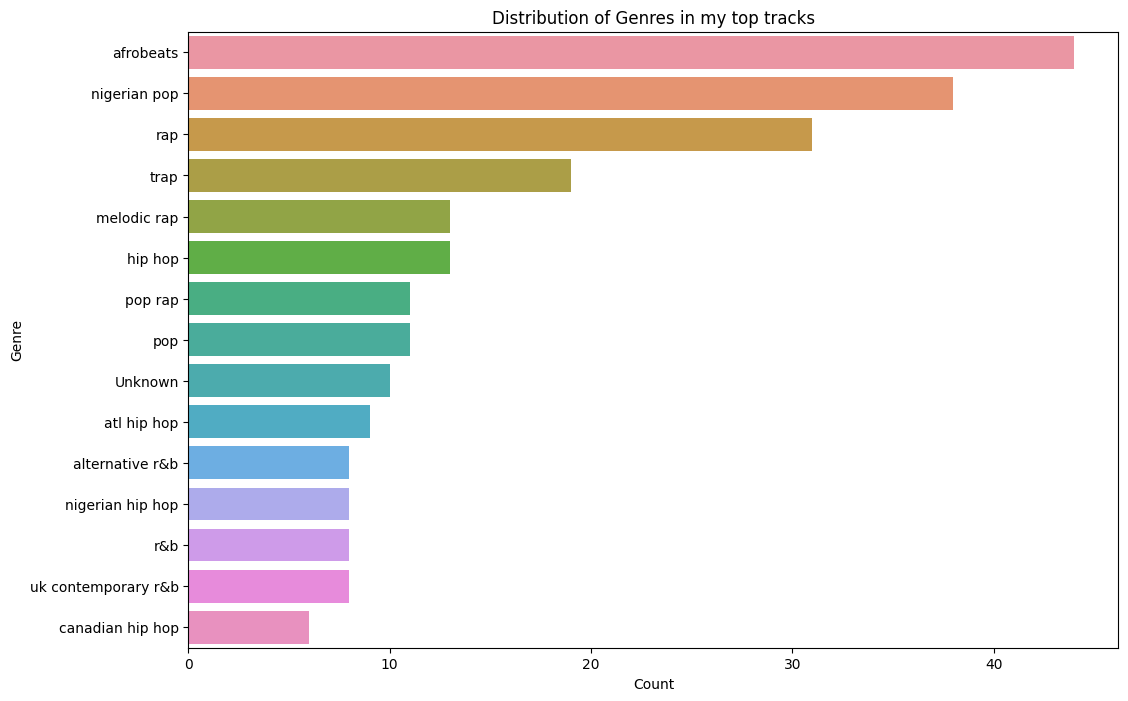

In [140]:
# Analysis 1: Distribution of Genres
genres = top_artists_df['Genres'].str.split(', ').explode()
genre_counts = genres.value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values[:15], y=genre_counts.index[:15], orient='h')

plt.title('Distribution of Genres in my top tracks')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [141]:
# Analysis 3: Top Artists by Popularity and Followers
top_popularity_artists = top_artists_df.nlargest(5, 'Popularity')
top_followers_artists = top_artists_df.nlargest(5, 'Followers')

print("Top Artists by Popularity:")
print(top_popularity_artists[['Artist_Name', 'Popularity']])

print("\nTop Artists by Followers:")
print(top_followers_artists[['Artist_Name', 'Followers']])


Top Artists by Popularity:
     Artist_Name  Popularity
20         Drake          94
25  Travis Scott          94
50         Drake          94
60  Travis Scott          94
90    The Weeknd          94

Top Artists by Followers:
      Artist_Name  Followers
0       SAINt JHN          0
1       Meek Mill          0
2  TRex_Beatmaker          0
3       Burna Boy          0
4           J Hus          0


In [142]:
# List of unique time ranges
time_ranges = top_artists_df['Time_Range'].unique()

# Iterate through the time ranges
for time_range in time_ranges:
    top_artist_time_range = top_artists_df[top_artists_df['Time_Range'] == time_range]
    top_artist = top_artist_time_range.loc[top_artist_time_range['Popularity'].idxmax()]

    print(f"Top Artist in {time_range.capitalize()}:")
    print(top_artist[['Artist_Name', 'Popularity', 'Followers']])
    print("-" * 30)


Top Artist in Short_term:
Artist_Name    Drake
Popularity        94
Followers          0
Name: 20, dtype: object
------------------------------
Top Artist in Medium_term:
Artist_Name    Drake
Popularity        94
Followers          0
Name: 50, dtype: object
------------------------------
Top Artist in Long_term:
Artist_Name    Drake
Popularity        94
Followers          0
Name: 98, dtype: object
------------------------------


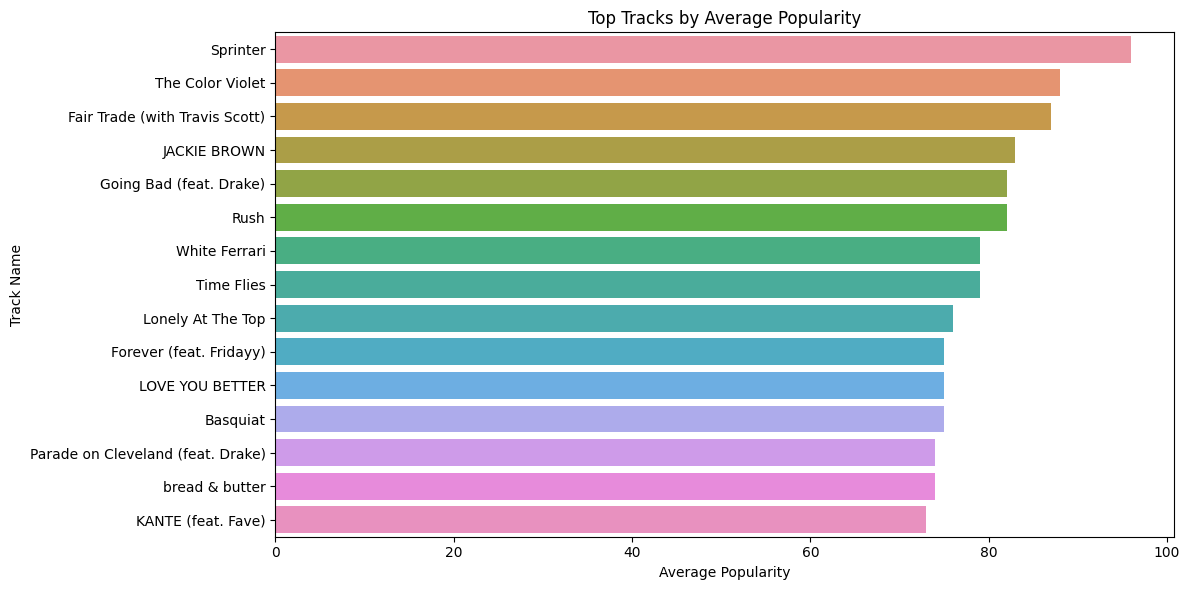

In [143]:
# Group by track name and calculate average popularity
track_popularity = top_tracks_df.groupby('Track_Name')['Popularity'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=track_popularity.values[:15], y=track_popularity.index[:15], orient='h')

plt.xlabel('Average Popularity')
plt.ylabel('Track Name')
plt.title('Top Tracks by Average Popularity')
plt.xticks(rotation=0)  # Horizontal x-axis labels for better readability
plt.tight_layout()
plt.show()

['short_term' 'medium_term' 'long_term']


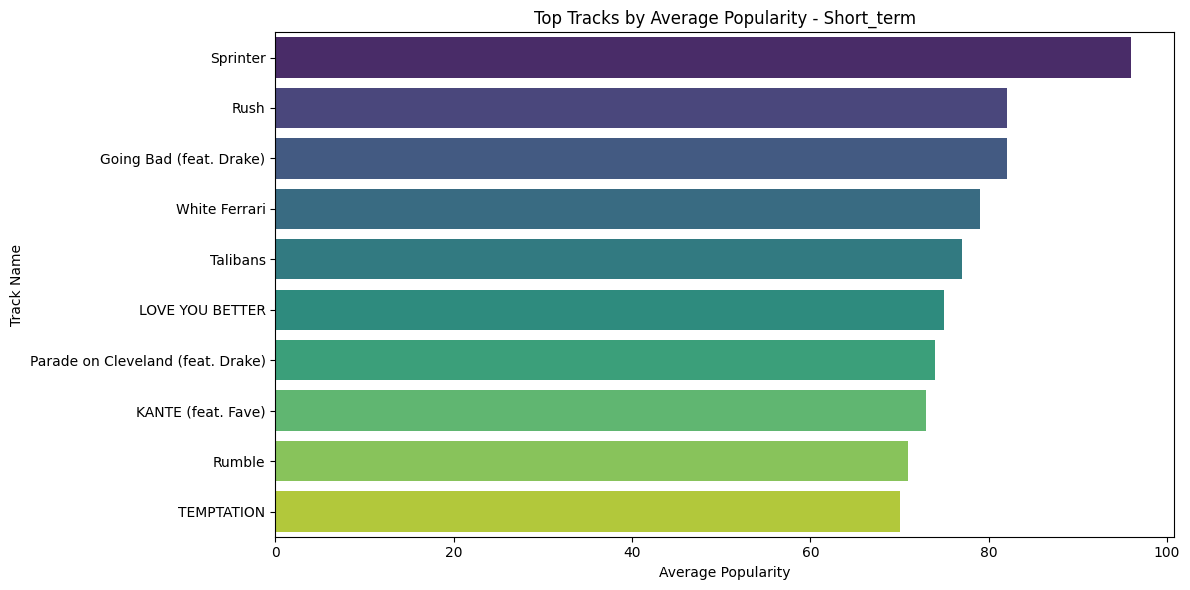

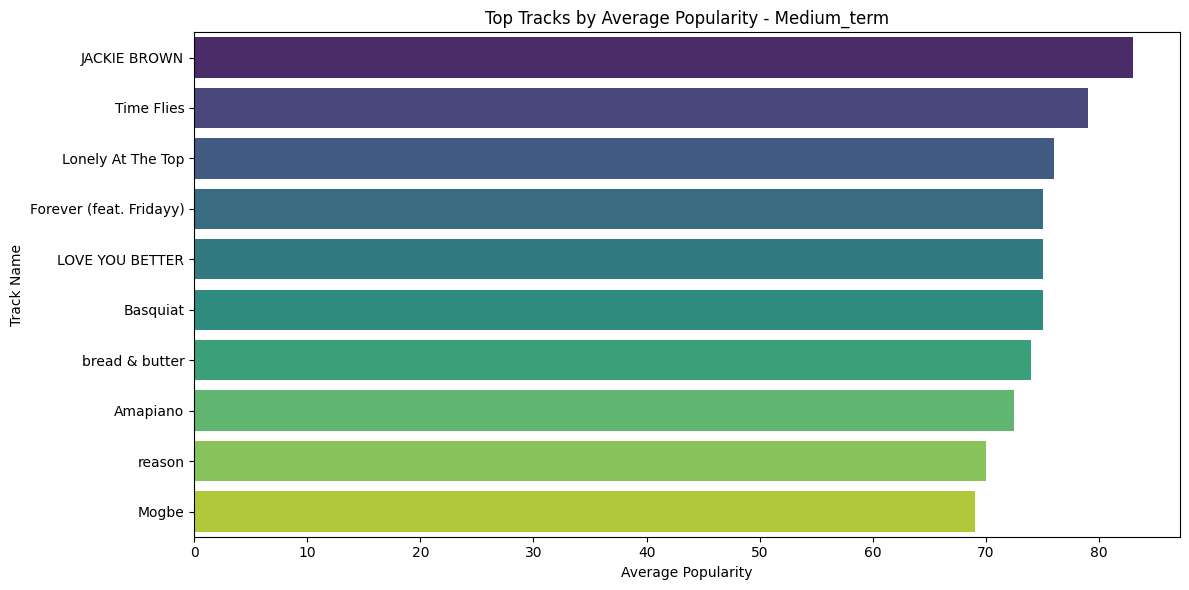

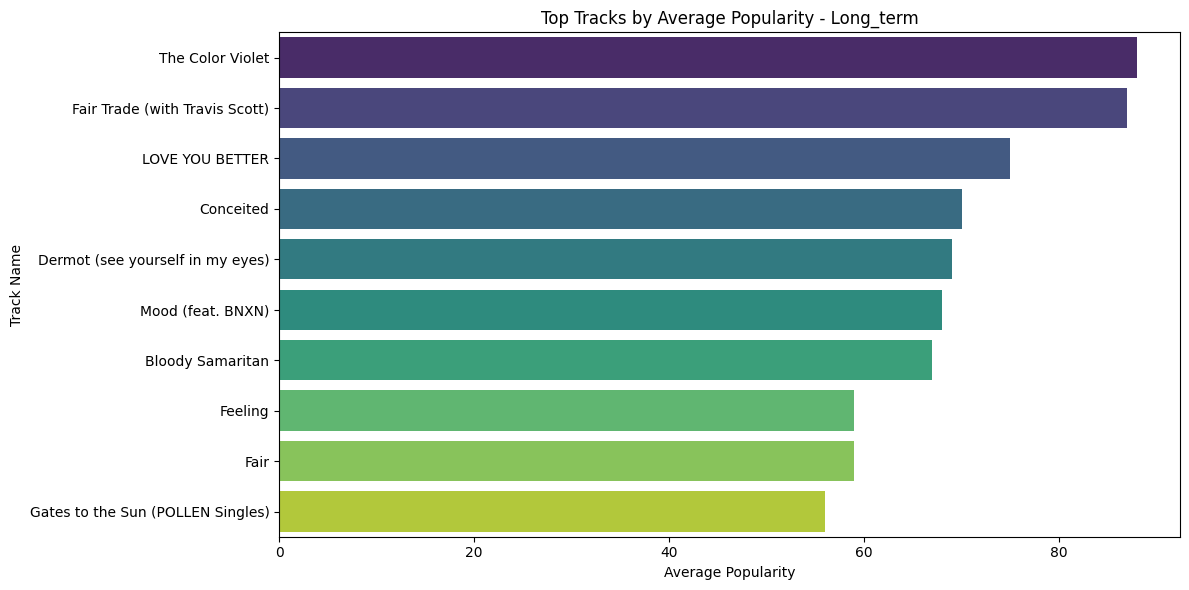

In [144]:
unique_time_ranges = top_tracks_df['Time_Range'].unique()
print(unique_time_ranges)


# Create a bar plot for each time range
for time_range in unique_time_ranges:
    tracks_by_time_range = top_tracks_df[top_tracks_df['Time_Range'] == time_range]
    track_popularity = tracks_by_time_range.groupby('Track_Name')['Popularity'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=track_popularity.values[:10], y=track_popularity.index[:10], palette='viridis')
    plt.xlabel('Average Popularity')
    plt.ylabel('Track Name')
    plt.title(f'Top Tracks by Average Popularity - {time_range.capitalize()}')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

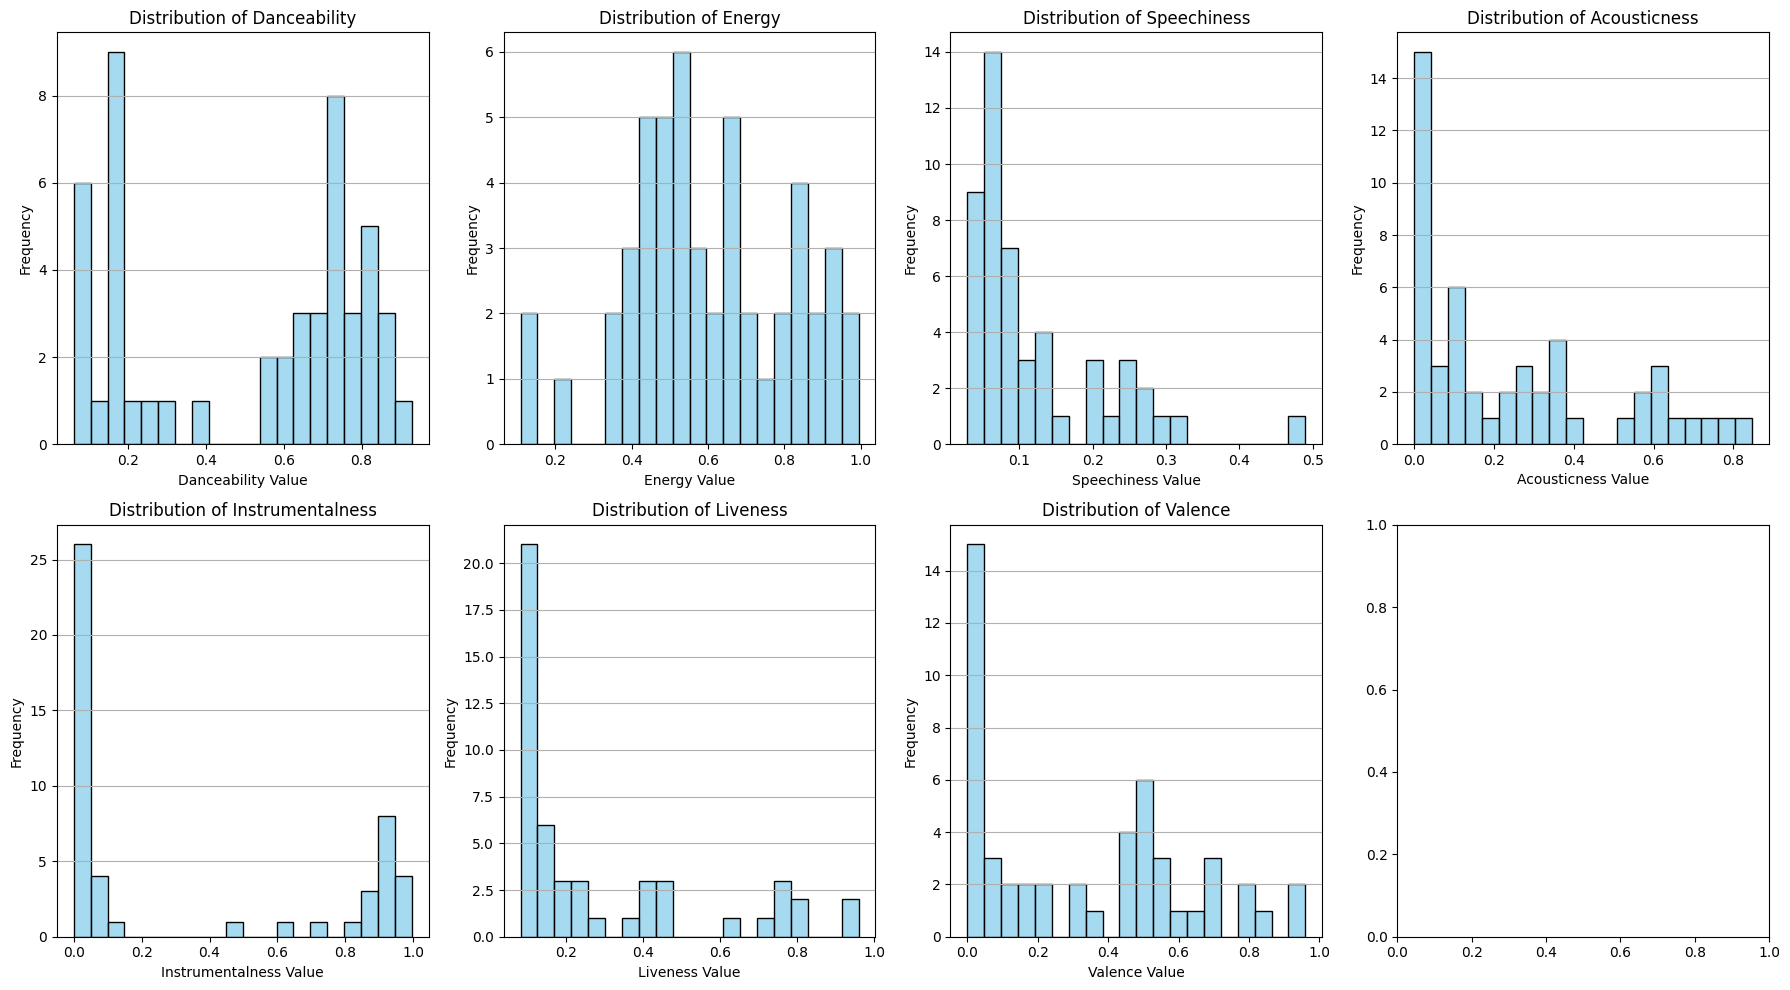

In [145]:
# Select the relevant columns from your recently played DataFrame
audio_features = recent_played_df[['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']]

# Set up a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Create histograms for each audio feature
for idx, feature in enumerate(audio_features.columns):
    row_idx = idx // 4
    col_idx = idx % 4
    sns.histplot(data=audio_features, x=feature, bins=20, ax=axes[row_idx, col_idx], color='skyblue', edgecolor='black')
    axes[row_idx, col_idx].set_xlabel(f'{feature} Value')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_title(f'Distribution of {feature}')
    axes[row_idx, col_idx].grid(axis='y')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [122]:
# convert it to a normal timestamp
recent_played_df['Played_At'] = pd.to_datetime(recent_played_df['Played_At'])

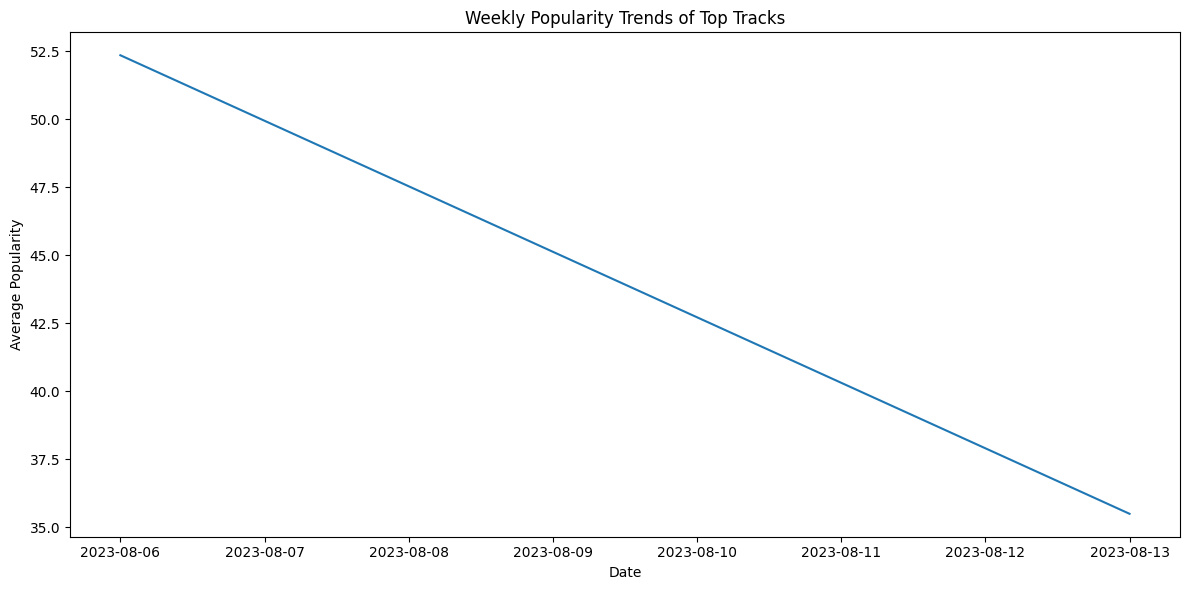

In [123]:
#Set the Played_At column as the index
recent_played_df.set_index('Played_At', inplace=True)

# Resample the data to weekly frequency and calculate the average popularity
weekly_popularity = recent_played_df['Popularity'].resample('W').mean()

# Create a line plot for weekly popularity trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_popularity)
plt.xlabel('Date')
plt.ylabel('Average Popularity')
plt.title('Weekly Popularity Trends of Top Tracks')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x800 with 0 Axes>

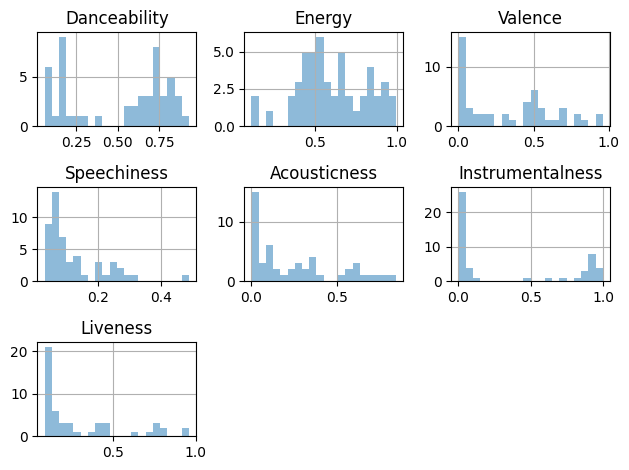

In [146]:
audio_features = recent_played_df[['Danceability', 'Energy', 'Valence', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness']]


plt.figure(figsize=(12, 8))
audio_features.hist(bins=20, alpha=0.5)
plt.xlabel('Audio Feature Value')
plt.ylabel('Frequency')
plt.title('Distribution of Audio Features')
plt.legend(title='Audio Feature')
plt.tight_layout()
plt.show()


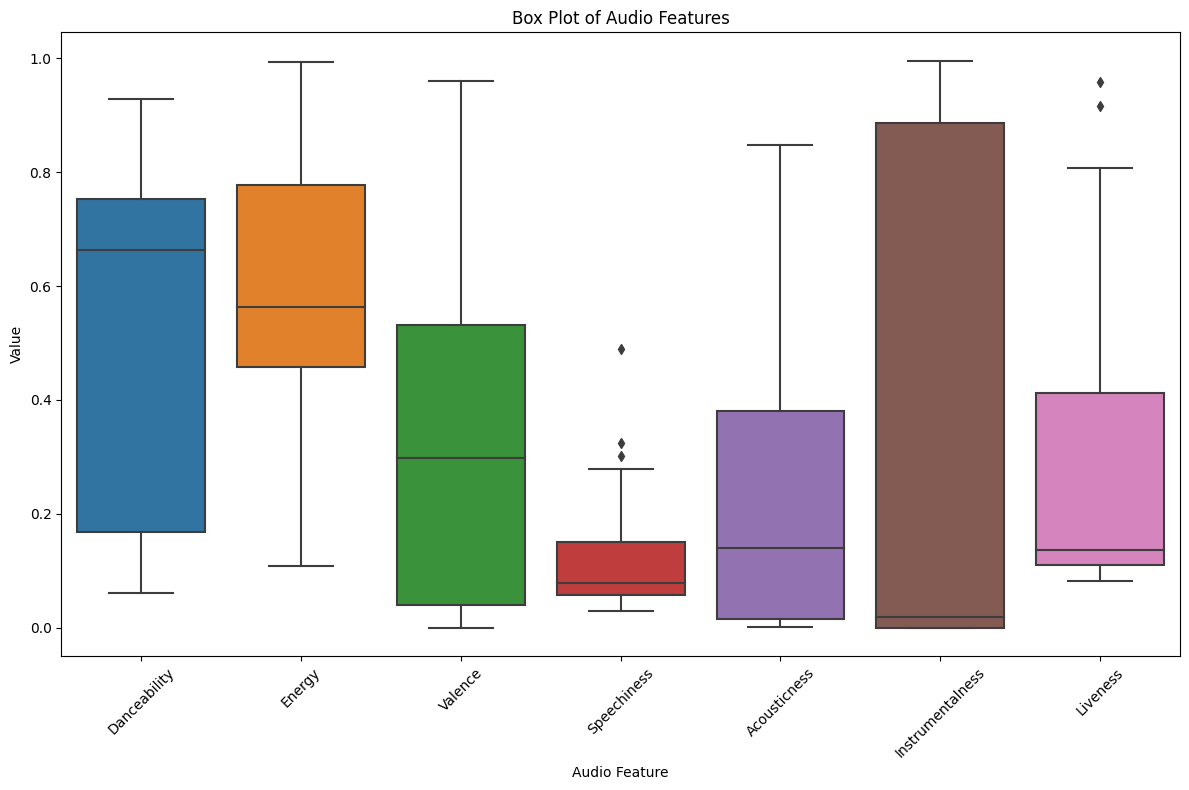

In [147]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=audio_features)
plt.xlabel('Audio Feature')
plt.ylabel('Value')
plt.title('Box Plot of Audio Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


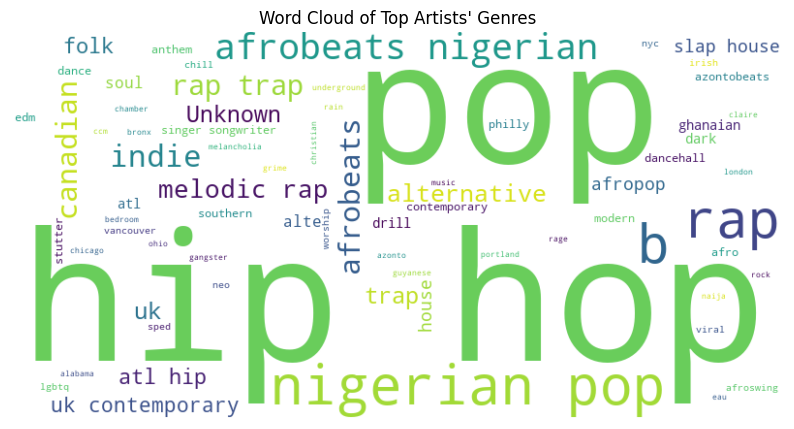

In [150]:
from wordcloud import WordCloud

all_genres = ', '.join(top_artists_df['Genres'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Artists\' Genres')
plt.show()

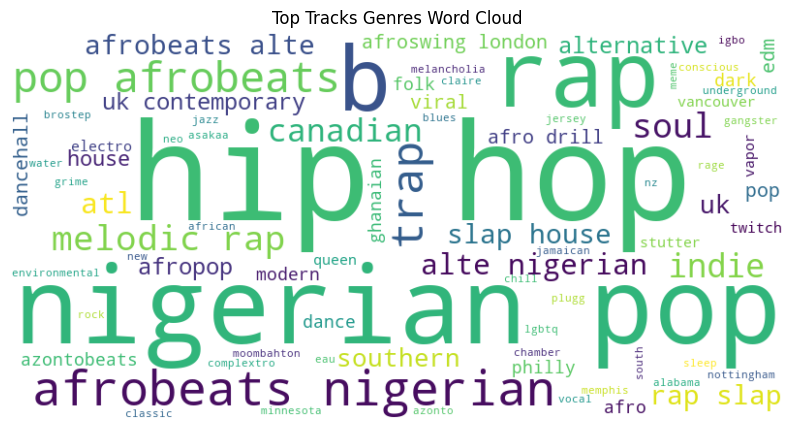

In [152]:
# Drop rows with missing values in the Genres column
top_tracks_df = top_tracks_df.dropna(subset=['Genres'])

# Join the genres into a single string
all_genres = ', '.join(top_tracks_df['Genres'])

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Tracks Genres Word Cloud')
plt.show()


In [166]:
print(top_tracks_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Track_Name   137 non-null    object
 1   Artist_Name  137 non-null    object
 2   Album_Name   137 non-null    object
 3   Popularity   137 non-null    int64 
 4   Time_Range   137 non-null    object
 5   Genres       137 non-null    object
dtypes: int64(1), object(5)
memory usage: 7.5+ KB
None


In [154]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px

In [186]:
import dash_bootstrap_components as dbc

app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    dcc.Tabs([
         dcc.Tab(label='Top Tracks Analysis', children=[
            html.Div([
                html.Label('Select Time Range:'),
                dcc.Dropdown(
                    id='time-range-dropdown',
                    options=[
                        {'label': 'Short Term', 'value': 'short_term'},
                        {'label': 'Medium Term', 'value': 'medium_term'},
                        {'label': 'Long Term', 'value': 'long_term'}
                    ],
                    value='short_term'
                ),
                dcc.Graph(id='top-tracks-plot')
            ])
        ]),

        dcc.Tab(label='Top Artists Analysis', children=[
            html.Div([
                html.Label('Select Time Range:'),
                dcc.Dropdown(
                    id='artist-time-range-dropdown',
                    options=[
                        {'label': 'Short Term', 'value': 'short_term'},
                        {'label': 'Medium Term', 'value': 'medium_term'},
                        {'label': 'Long Term', 'value': 'long_term'}
                    ],
                    value='short_term'
                ),
                dbc.Row(id='artist-cards-container', className='card-columns')
            ])
        ]),
        dcc.Tab(label='Audio Features Distribution', children=[
            
        ]),
        dcc.Tab(label='Time Series Analysis', children=[
            # Include the time series analysis plots
        ]),
        dcc.Tab(label='Time of Day Analysis', children=[
            # Include the time of day analysis plots
        ]),
        dcc.Tab(label='Genre Analysis', children=[
           html.Div([
                html.Label('Select Time Range:'),
                dcc.Dropdown(
                    id='genre-time-range-dropdown',
                    options=[
                        {'label': 'Short Term', 'value': 'short_term'},
                        {'label': 'Medium Term', 'value': 'medium_term'},
                        {'label': 'Long Term', 'value': 'long_term'}
                    ],
                    value='short_term'
                ),
                dcc.Graph(id='genre-distribution-plot')
            ])
        ]),
        dcc.Tab(label='Word Cloud Analysis', children=[
            # Include the word cloud analysis plot
        ]),
    ])
])

@app.callback(
    Output('top-tracks-plot', 'figure'),  # Update the figure of the plot
    Input('time-range-dropdown', 'value')  # User input
)

def update_top_tracks_plot(selected_time_range):
    # Filter top_tracks_df based on selected_time_range
    filtered_df = top_tracks_df[top_tracks_df['Time_Range'] == selected_time_range]

    # Sort the filtered_df by Popularity and select the top 15 tracks
    sorted_df = filtered_df.sort_values(by='Popularity', ascending=False).head(15)
    
    # Create the plot using Plotly Express (customize as needed)
    fig = px.bar(
        data_frame=sorted_df,
        x='Track_Name',
        y='Popularity',
        color='Popularity',
        title=f'Top Tracks Popularity - {selected_time_range.capitalize()}'
    )
    return fig


@app.callback(
    Output('artist-cards-container', 'children'),  
    Input('artist-time-range-dropdown', 'value') 
)

def update_artist_cards(selected_time_range):
    # Filter top_artists_df based on selected_time_range
    filtered_df = top_artists_df[top_artists_df['Time_Range'] == selected_time_range]
    
    # Create a list of artist cards
    artist_cards = []
    for index, row in filtered_df.iterrows():
        card = dbc.Card([
            dbc.CardImg(src=row['Image_URL']),
            dbc.CardBody([
                html.H4(row['Artist_Name'], className='card-title')
            ])
        ], className='col-lg-3 col-md-4 col-sm-6 mb-4')  # Bootstrap grid classes
        artist_cards.append(card)
    
    return dbc.Row(artist_cards, className='row-cols-1 row-cols-md-2 row-cols-lg-4')


@app.callback(
    Output('genre-distribution-plot', 'figure'),  # Update the genre distribution plot
    Input('genre-time-range-dropdown', 'value')  # User input
)
def update_genre_distribution(selected_time_range):
    # Filter top_artists_df based on selected_time_range
    filtered_df = top_artists_df[top_artists_df['Time_Range'] == selected_time_range]
    
    # Calculate genre counts
    genres = filtered_df['Genres'].str.split(', ').explode()
    genre_counts = genres.value_counts().sort_values(ascending=False)
    
    # Create the genre distribution plot using Plotly Express (customize as needed)
    fig = px.bar(
        data_frame=genre_counts[:15].reset_index(),
        x='Genres',
        y='Genres',
        orientation='h',
        text='Genres',
        title=f'Distribution of Genres in my top artists - {selected_time_range.capitalize()}',
        labels={'Genres': 'Genre', 'index': 'Count'}
    )
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    
    return fig


app.run_server(debug = True, use_reloader = False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: on
